**IMPORTING Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

df=pd.read_csv("/content/delivery_time.csv")

In [3]:
df.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

**Renaming colums**

In [4]:
df.rename(columns={"Delivery Time":"delivery_time","Sorting Time":"shorting_time"},inplace=True)

In [5]:
df.info() #as we see we have no null values in are data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   shorting_time  21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


***Correlation coefficient of variables***

In [6]:
df.corr()

delivery_time  shorting_time
delivery_time       1.000000       0.825997
shorting_time       0.825997       1.000000

**Checking ouliers and visulization**

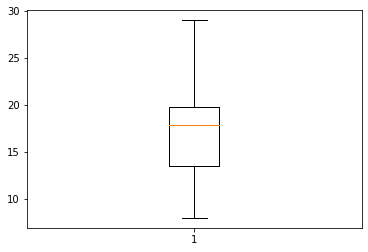

In [7]:
plt.boxplot(df["delivery_time"])
plt.show()

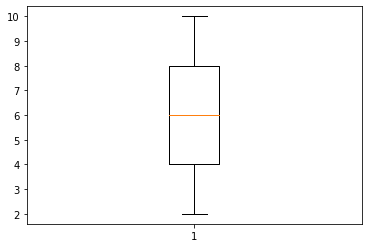

In [8]:
plt.boxplot(df["shorting_time"])
plt.show()

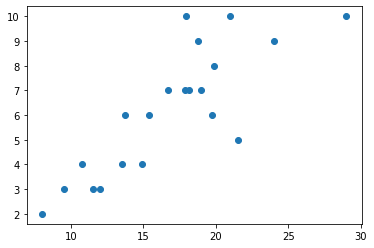

In [9]:
plt.scatter(df["delivery_time"],df["shorting_time"])
plt.show()

**Creating model**

In [10]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~shorting_time",data=df).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


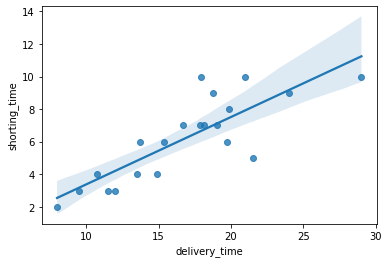

In [11]:
sns.regplot(x="delivery_time", y="shorting_time", data=df)

In [12]:
model.params

Intercept        6.582734
shorting_time    1.649020
dtype: float64

In [13]:
model.pvalues   #As we see p value is less than 0.05 we can say value is significant

Intercept        0.001147
shorting_time    0.000004
dtype: float64

In [14]:
print("r^2 :",model.rsquared) #Accurancy of model is Good

r^2 : 0.6822714748417231


In [15]:
delivery_pre=model.predict(df["shorting_time"])


In [16]:
df["delivery_time_pre"]=delivery_pre
df

delivery_time  shorting_time  delivery_time_pre
0           21.00             10          23.072933
1           13.50              4          13.178814
2           19.75              6          16.476853
3           24.00              9          21.423913
4           29.00             10          23.072933
5           15.35              6          16.476853
6           19.00              7          18.125873
7            9.50              3          11.529794
8           17.90             10          23.072933
9           18.75              9          21.423913
10          19.83              8          19.774893
11          10.75              4          13.178814
12          16.68              7          18.125873
13          11.50              3          11.529794
14          12.03              3          11.529794
15          14.88              4          13.178814
16          13.75              6          16.476853
17          18.11              7          18.125873
18           8.00              2           9.880774
19          17.83              7          18.125873
20          21.50              5          14.827833

**Lets Do some transformation to increase accurancy(R_SQUARED)**

**1) LOG TRANSFORMATION**

In [18]:
x=np.log(df["shorting_time"])
y=df["delivery_time"]
df2=pd.DataFrame({"delivery_time2":y,"log_shorting_time":x})
df2

delivery_time2  log_shorting_time
0            21.00           2.302585
1            13.50           1.386294
2            19.75           1.791759
3            24.00           2.197225
4            29.00           2.302585
5            15.35           1.791759
6            19.00           1.945910
7             9.50           1.098612
8            17.90           2.302585
9            18.75           2.197225
10           19.83           2.079442
11           10.75           1.386294
12           16.68           1.945910
13           11.50           1.098612
14           12.03           1.098612
15           14.88           1.386294
16           13.75           1.791759
17           18.11           1.945910
18            8.00           0.693147
19           17.83           1.945910
20           21.50           1.609438

In [51]:
df2.corr()

delivery_time2  log_shorting_time
delivery_time2           1.000000           0.833933
log_shorting_time        0.833933           1.000000

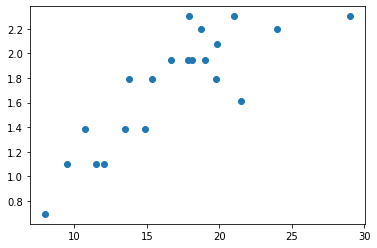

In [19]:
plt.scatter(df2["delivery_time2"],df2["log_shorting_time"])

**creating model**

In [20]:
model2=smf.ols("delivery_time2~log_shorting_time",data=df2).fit()

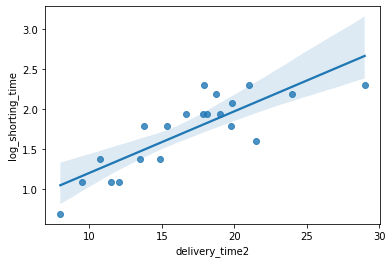

In [21]:
sns.regplot(x="delivery_time2", y="log_shorting_time", data=df2)

In [22]:
model2.params

Intercept            1.159684
log_shorting_time    9.043413
dtype: float64

In [23]:
model2.rsquared #accurancy is better than before

0.6954434611324224

In [24]:
model2.pvalues # variable is significant

Intercept            0.641980
log_shorting_time    0.000003
dtype: float64

**2) square transformation**

In [25]:
df3=pd.DataFrame({"delivery_time3":df["delivery_time"],"sq_shorting_time":np.square(df["shorting_time"])})
df3

delivery_time3  sq_shorting_time
0            21.00               100
1            13.50                16
2            19.75                36
3            24.00                81
4            29.00               100
5            15.35                36
6            19.00                49
7             9.50                 9
8            17.90               100
9            18.75                81
10           19.83                64
11           10.75                16
12           16.68                49
13           11.50                 9
14           12.03                 9
15           14.88                16
16           13.75                36
17           18.11                49
18            8.00                 4
19           17.83                49
20           21.50                25

In [52]:
df3.corr()

delivery_time3  sq_shorting_time
delivery_time3          1.000000          0.793906
sq_shorting_time        0.793906          1.000000

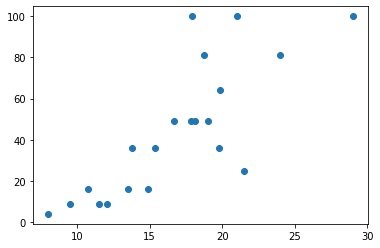

In [26]:
plt.scatter(df3["delivery_time3"],df3["sq_shorting_time"])

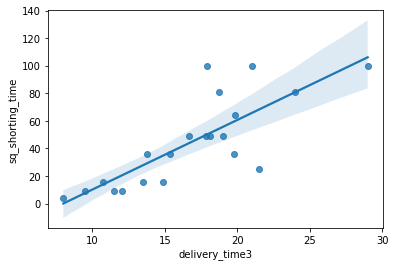

In [27]:
sns.regplot(x="delivery_time3",y="sq_shorting_time",data=df3)

**Creating model**

In [28]:
model3=smf.ols("delivery_time3~sq_shorting_time",data=df3).fit()

In [53]:
model3.params

Intercept           11.237205
sq_shorting_time     0.124870
dtype: float64

In [54]:
model3.pvalues #variable is significance

Intercept           1.415704e-08
sq_shorting_time    1.739194e-05
dtype: float64

In [30]:
model3.rsquared  #acuurancy is lower than both model

0.6302871815826638

**3) square root transformation**

In [31]:
df4=pd.DataFrame({"delivery_time4":df["delivery_time"],"sqrt_shorting_time":np.sqrt(df["shorting_time"])})
df4

delivery_time4  sqrt_shorting_time
0            21.00            3.162278
1            13.50            2.000000
2            19.75            2.449490
3            24.00            3.000000
4            29.00            3.162278
5            15.35            2.449490
6            19.00            2.645751
7             9.50            1.732051
8            17.90            3.162278
9            18.75            3.000000
10           19.83            2.828427
11           10.75            2.000000
12           16.68            2.645751
13           11.50            1.732051
14           12.03            1.732051
15           14.88            2.000000
16           13.75            2.449490
17           18.11            2.645751
18            8.00            1.414214
19           17.83            2.645751
20           21.50            2.236068

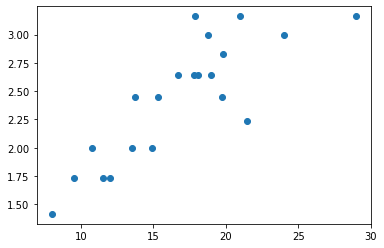

In [32]:
plt.scatter(x="delivery_time4",y="sqrt_shorting_time",data=df4)

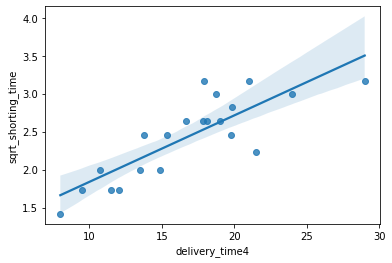

In [33]:

sns.regplot(x="delivery_time4",y="sqrt_shorting_time",data=df4)




In [34]:
model4=smf.ols("delivery_time4~sqrt_shorting_time",data=df4).fit()

In [55]:
model4.params

Intercept            -2.518837
sqrt_shorting_time    7.936591
dtype: float64

In [56]:
model4.pvalues #variable is significance

Intercept             0.410857
sqrt_shorting_time    0.000003
dtype: float64

In [36]:
model4.rsquared #accurancy is high among all of model

0.695806227630867

**4) Exponetial transformation**

In [37]:
df5=pd.DataFrame({"delivery_time5":df["delivery_time"],"exp_shorting_time":np.exp(df["shorting_time"])})
df5

delivery_time5  exp_shorting_time
0            21.00       22026.465795
1            13.50          54.598150
2            19.75         403.428793
3            24.00        8103.083928
4            29.00       22026.465795
5            15.35         403.428793
6            19.00        1096.633158
7             9.50          20.085537
8            17.90       22026.465795
9            18.75        8103.083928
10           19.83        2980.957987
11           10.75          54.598150
12           16.68        1096.633158
13           11.50          20.085537
14           12.03          20.085537
15           14.88          54.598150
16           13.75         403.428793
17           18.11        1096.633158
18            8.00           7.389056
19           17.83        1096.633158
20           21.50         148.413159

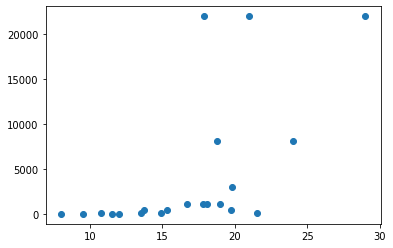

In [38]:
plt.scatter(x="delivery_time5",y="exp_shorting_time",data=df5)

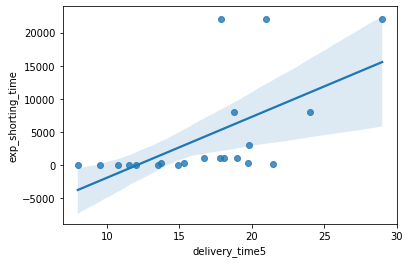

In [39]:
sns.regplot(x="delivery_time5",y="exp_shorting_time",data=df5)

In [40]:
model5=smf.ols("delivery_time5~exp_shorting_time",data=df5).fit()

In [57]:
model5.params

Intercept            15.083578
exp_shorting_time     0.000393
dtype: float64

In [58]:
model5.pvalues   #variable is significance

Intercept            1.117304e-11
exp_shorting_time    3.964511e-03
dtype: float64

In [49]:
model5.rsquared #accurancy is lowest among all models

0.3611177022709089

# **RESULT**

In [59]:
result=pd.DataFrame({"Model_1_normal":[model.rsquared],"Model_2_log":[model2.rsquared],"Model_3_square":[model3.rsquared],"Model_4_sqrt":[model4.rsquared],
                     "Model_5_exponential":[model5.rsquared]},index=["r_squared"])
result

Model_1_normal  Model_2_log  ...  Model_4_sqrt  Model_5_exponential
r_squared        0.682271     0.695443  ...      0.695806             0.361118

[1 rows x 5 columns]

**Using model 4 to prdict Delivery time dur to high R squared value**

In [65]:
#x=int(input("sorting_time :"))
#y=np.sqrt(x)
#print("Delivery_Time :", -2.518837+7.936591*y)

sorting_time :4
Delivery_Time : 13.354345
